In [5]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
bank_data = pd.read_csv("/Users/adamdanielgreen/Desktop/Business Statistics/Classification-20231218/bank_full.csv", delimiter=";")

In [6]:
# Features and target variable
X = bank_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'duration']]
y = bank_data['y']

In [7]:
# Create a column transformer to one-hot encode the categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

In [8]:
# Create and train a Decision Tree model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(min_samples_split=2, criterion="entropy"))
])

model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('classifier', DecisionTreeClassifier(criterion='entropy'))])

In [10]:
# Get one-hot encoded feature names
#one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(categorical_features)
# Get all one-hot encoded feature names
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()


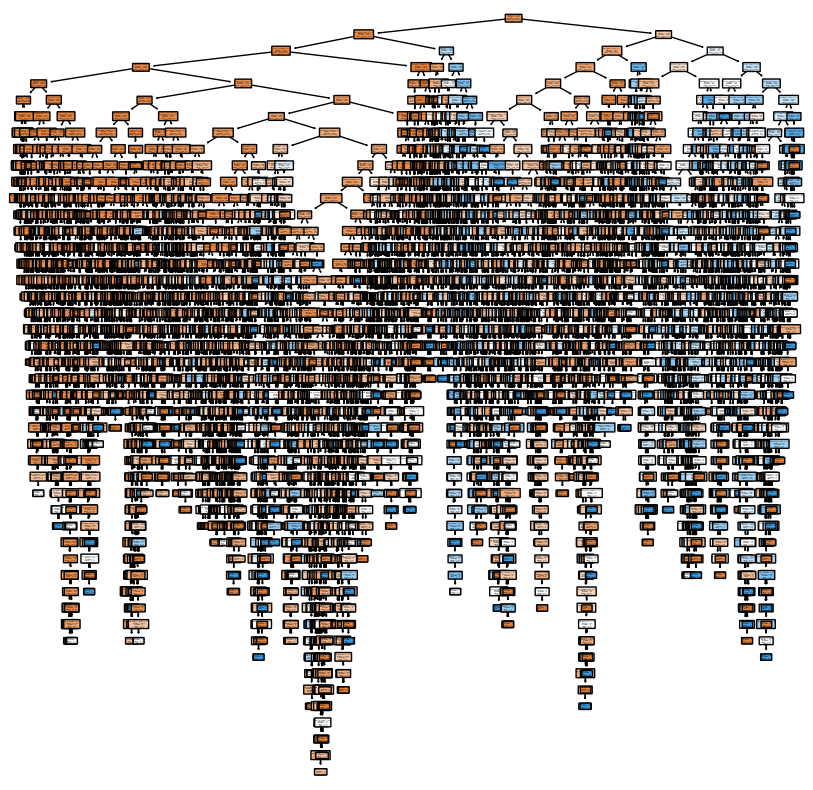

In [13]:
# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(
    model.named_steps['classifier'],
    feature_names=one_hot_feature_names.tolist() + ['duration'],  # Include 'duration' as a feature name
    class_names=['no', 'yes'],
    filled=True,
    rounded=True
)
plt.show()

In [14]:
# Prediction for a new customer
new_customer = pd.DataFrame({'job': ['entrepreneur'], 'marital': ['married'], 'education': ['secondary'],
                             'default': ['no'], 'housing': ['yes'], 'loan': ['yes'], 'contact': ['cellular'],
                             'poutcome': ['failure'], 'duration': [523]})
prediction = model.predict(new_customer)
print("Predicted outcome for the new customer: " + prediction[0])

Predicted outcome for the new customer: no


In [15]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder


# Load the dataset
bank_data = pd.read_csv("/Users/adamdanielgreen/Desktop/Business Statistics/Classification-20231218/bank_full.csv", delimiter=";")

# Create the "duration2" column by discretizing the "duration" variable
bank_data['duration2'] = bank_data['duration'].apply(lambda x: "<411" if x < 411 else ">411")

# Features and target variable
X = pd.get_dummies(bank_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'duration2']])
y = bank_data['y']

# Create and train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X, y)

# New customer data with relevant columns
new_customer = pd.DataFrame({
    'job': ['management'],
    'marital': ['single'],
    'education': ['university.degree'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'poutcome': ['success'],
    'duration2': ['>411']  # Make sure this matches the duration2 values used in training
})

# Ensure new_customer has the same columns as X (training data)
new_customer = pd.get_dummies(new_customer)
new_customer = new_customer.reindex(columns=X.columns, fill_value=0)

# Make a prediction for the new customer
result = model.predict(new_customer)
print("Predicted outcome for the new customer using Multinomial Naive Bayes: " + result[0])

Predicted outcome for the new customer using Multinomial Naive Bayes: yes
